# Домашнее задание «Случайные события. Случайные величины»

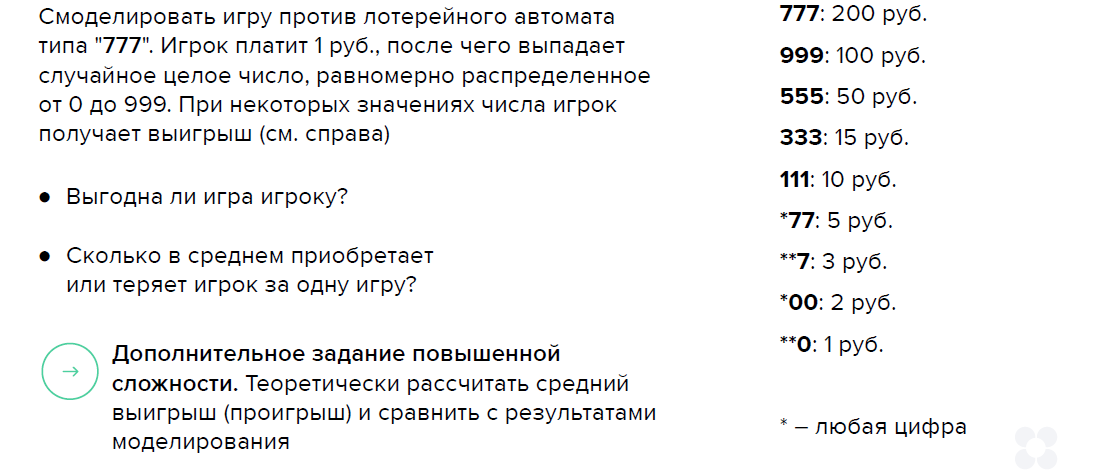

In [1]:
import numpy as np

<div class="alert alert-success">
<h3> Задание 1. Моделирование игры</h3>
</div>

In [2]:
top_payouts = {777: 200, 999: 100, 555: 50, 333: 15, 111: 10}

In [3]:
def calculate_payout(num):
    if num in top_payouts:
        return top_payouts[num]
    elif num % 100 == 77:
        return 5
    elif num % 10 == 7:
        return 3
    elif num % 100 == 0:
        return 2
    elif num % 10 == 0:
        return 1
    return 0

In [4]:
assert calculate_payout(777) == 200
assert calculate_payout(999) == 100
assert calculate_payout(555) == 50
assert calculate_payout(333) == 15
assert calculate_payout(111) == 10
assert calculate_payout(77) == 5
assert calculate_payout(977) == 5
assert calculate_payout(7) == 3
assert calculate_payout(17) == 3
assert calculate_payout(517) == 3
assert calculate_payout(0) == 2
assert calculate_payout(100) == 2
assert calculate_payout(10) == 1
assert calculate_payout(180) == 1
assert calculate_payout(888) == 0
assert calculate_payout(182) == 0

In [5]:
np.random.seed(42)

avg_win_loss = np.array([calculate_payout(num) for num in np.random.randint(0, 1000, 10**6)]).mean() - 1

# seed(42), avg_win_loss = -0.207176

In [6]:
print(f"Игра игроку{'' if avg_win_loss > 0 else ' не'} выгодна.")
print(f'Средний выигрыш (проигрыш) за одну игру при моделировании составил {avg_win_loss:.2f} руб.')

Игра игроку не выгодна.
Средний выигрыш (проигрыш) за одну игру при моделировании составил -0.21 руб.


<div class="alert alert-success">
<h3> Задание 2. Теоретический расчет матожидания </h3>
</div>

Поскольку выпадение каждого числа равновероятно по условию,  
можно просто посчитать средний выигрыш от полного набора вариантов от 000 до 999: 

In [7]:
# если попроще

np.array([calculate_payout(num) for num in range(1000)]).mean() - 1 

-0.19999999999999996

In [8]:
# если посложнее

((1 / 1000 * 200) + # 777
 (1 / 1000 * 100) + # 999
 (1 / 1000 * 50)  + # 555
 (1 / 1000 * 15)  + # 333
 (1 / 1000 * 10)  + # 111
 (9 / 1000 * 5)   + # 077 177 277 377 477 577 677 _ 877 977
 (90 / 1000 * 3)  + # 007 017 027 037 047 057 067 _ 087 097 * 10
 (10 / 1000 * 2)  + # 000 100 200 300 400 500 600 700 800 900
 (90 / 1000 * 1)  + # 010 020 030 040 050 060 070 080 090 * 10
 ((1000 - 5 - 9 - 90 - 10 - 90) / 1000 * 0)) - 1

-0.19999999999999996

то есть теоретически в среднем игрок теряет ровно 20 копеек за одну игру.